In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel

In [2]:
image_size = 128
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [4]:
# X_train = []
# y_train = []
# for i in labels:
#     folderPath = os.path.join('/Users/pranavmoses/Desktop/5505/Project-INFO5505-Pranav Moses/project/tumor.v3i.folder','train',i)
#     for j in enumerate(os.listdir(folderPath)):
#         if j[0] == 2500:
#             break
#         img = cv2.imread(os.path.join(folderPath,j[1]))
#         img = cv2.resize(img,(image_size, image_size))
#         X_train.append(img)
#         y_train.append(i)
#     print('Done with training data for:', i)
        
X_test = []
y_test = []
for i in labels:
    folderPath = os.path.join('/Users/pranavmoses/Desktop/5505/Project-INFO5505-Pranav Moses/project/tumor.v3i.folder','test',i)
    for j in enumerate(os.listdir(folderPath)):
        if j[0] == 500:
            break
        img = cv2.imread(os.path.join(folderPath,j[1]))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)
    print('Done with training data for:', i)

# X_train = np.array(X_train)
# y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

Done with training data for: glioma_tumor
Done with training data for: no_tumor
Done with training data for: meningioma_tumor
Done with training data for: pituitary_tumor


In [5]:
#Encode labels from text (folder names) to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# le.fit(y_train)
# y_train = le.transform(y_train)
y_test = le.fit_transform(y_test)

In [5]:
# Normalize pixel values to between 0 and 1
X_train_n, X_test_n = X_train / 255.0, X_test / 255.0

In [6]:
X_test_n = X_test/255.0

In [6]:
X_train.shape

(10000, 128, 128, 3)

In [7]:
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):
        df = pd.DataFrame()
        input_img = x_train[image, :,:,:]
        img = input_img

         # FEATURE 1 - Pixel values
        #Add pixel values to the data frame
        pixel_values = img.reshape(-1) #flattening
        df['Pixel_Value'] = pixel_values   
        #Pixel value itself as a feature
        #df['Image_Name'] = image   #Capture image name as we read multiple images
        # FEATURE 2 - Bunch of Gabor filter responses
        
                #Generate Gabor features
        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        kernels = []
        for theta in range(2):   #Define number of thetas
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  #Sigma with 1 and 3
                lamda = np.pi/4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                # print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
         
    #     FEATURE 3 Sobel
        edge_sobel = sobel(img)
        edge_sobel1 = edge_sobel.reshape(-1)
        df['Sobel'] = edge_sobel1
       
        #Add more filters as needed
        
        #Append features from current image to the dataset
        image_dataset = pd.concat([image_dataset, df])
        
    return image_dataset

In [8]:
image_features = feature_extractor(X_train_n)

In [9]:
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_training = np.reshape(image_features, (X_train_n.shape[0], -1))  #Reshape to #images, features

In [8]:
test_features = feature_extractor(X_test_n)
test_features = np.expand_dims(test_features, axis=0)
X_for_testing = np.reshape(test_features, (X_test_n.shape[0], -1))

In [11]:
# from sklearn.ensemble import RandomForestClassifier
# RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# # Fit the model on training data
# RF_model.fit(X_for_training, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [12]:
# #Can also use SVM but RF is faster and may be more accurate.
# from sklearn import svm
# SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification
# SVM_model.fit(X_for_training, y_train)

SVC(decision_function_shape='ovo')

In [13]:
# from sklearn.naive_bayes import GaussianNB
# NVB_model = GaussianNB()
# NVB_model.fit(X_for_training, y_train)

GaussianNB()

In [9]:
import pickle
# filename = 'RF_model.sav'
# pickle.dump(RF_model, open(filename, 'wb'))


In [15]:
# pickle.dump(SVM_model, open('SVM_model.sav', 'wb'))
# pickle.dump(NVB_model, open('NVB_model.sav', 'wb'))

In [10]:
RF_mdl = pickle.load(open('/Users/pranavmoses/Desktop/5505/Project-INFO5505-Pranav Moses/project/SRC/RF_model.sav', 'rb'))
SVM_mdl = pickle.load(open('/Users/pranavmoses/Desktop/5505/Project-INFO5505-Pranav Moses/project/SRC/SVM_model.sav', 'rb'))
NVB_mdl = pickle.load(open('/Users/pranavmoses/Desktop/5505/Project-INFO5505-Pranav Moses/project/SRC/NVB_model.sav', 'rb'))

/opt/anaconda3/envs/TestEnv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/envs/TestEnv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/envs/TestEnv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 

In [11]:
X_test_n.shape, y_test.shape

((1377, 128, 128, 3), (1377,))

In [12]:
#Predict on test
test_prediction = RF_mdl.predict(X_for_testing)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

In [13]:
test_prediction

array(['glioma_tumor', 'glioma_tumor', 'glioma_tumor', ...,
       'pituitary_tumor', 'pituitary_tumor', 'pituitary_tumor'],
      dtype='<U16')

In [17]:
y_test = le.inverse_transform(y_test)

In [ ]:
test_prediction_svm = SVM_model.predict(X_for_testing)
#Inverse le transform to get original label back. 
test_prediction_svm = le.inverse_transform(test_prediction_svm)

In [ ]:
test_prediction_nvb = NVB_model.predict(X_for_testing)
#Inverse le transform to get original label back. 
test_prediction_nvb = le.inverse_transform(test_prediction_nvb)

In [ ]:
test_prediction_svm

In [ ]:
test_prediction_nvb

In [118]:
test_prediction

array(['glioma_tumor', 'glioma_tumor', 'glioma_tumor', ...,
       'pituitary_tumor', 'pituitary_tumor', 'pituitary_tumor'],
      dtype='<U16')

In [ ]:
y_test

array(['glioma_tumor', 'glioma_tumor', 'glioma_tumor', ...,
       'pituitary_tumor', 'pituitary_tumor', 'pituitary_tumor'],
      dtype='<U16')

In [18]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy for random Forest = ", metrics.accuracy_score(y_test, test_prediction))

Accuracy for random Forest =  0.9005083514887436


In [ ]:
print ("Accuracy for SVM = ", metrics.accuracy_score(y_test, test_prediction_svm))

Accuracy for SVM =  0.7436456063907044


In [ ]:
print ("Accuracy for Naive Bayes = ", metrics.accuracy_score(y_test, test_prediction_nvb))

Accuracy for Naive Bayes =  0.6100217864923747


In [23]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, test_prediction)
print(classification_report(y_test, test_prediction))

                  precision    recall  f1-score   support

    glioma_tumor       0.90      0.84      0.87       389
meningioma_tumor       0.78      0.81      0.80       275
        no_tumor       0.95      1.00      0.97       334
 pituitary_tumor       0.95      0.95      0.95       379

        accuracy                           0.90      1377
       macro avg       0.89      0.90      0.90      1377
    weighted avg       0.90      0.90      0.90      1377



<Axes: >

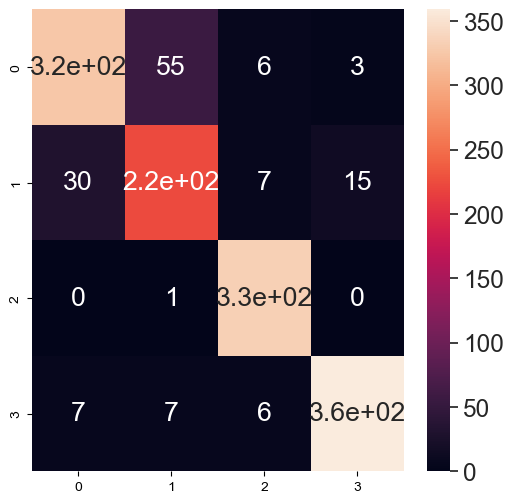

In [21]:
cm = confusion_matrix(y_test, test_prediction)
fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

<Axes: >

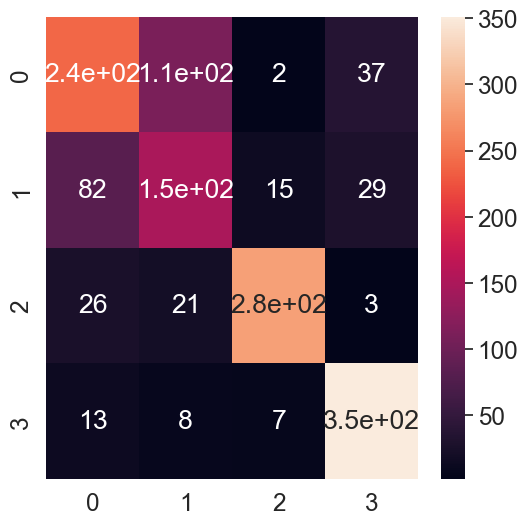

In [ ]:
cm_svm = confusion_matrix(y_test, test_prediction_svm)
fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm_svm, annot=True, ax=ax)

In [ ]:
print(classification_report(y_test, test_prediction_svm))

                  precision    recall  f1-score   support

    glioma_tumor       0.66      0.62      0.64       389
meningioma_tumor       0.52      0.54      0.53       275
        no_tumor       0.92      0.85      0.88       334
 pituitary_tumor       0.84      0.93      0.88       379

        accuracy                           0.74      1377
       macro avg       0.73      0.73      0.73      1377
    weighted avg       0.74      0.74      0.74      1377



                  precision    recall  f1-score   support

    glioma_tumor       0.48      0.67      0.56       389
meningioma_tumor       0.50      0.01      0.02       275
        no_tumor       0.92      0.84      0.88       334
 pituitary_tumor       0.56      0.78      0.65       379

        accuracy                           0.61      1377
       macro avg       0.62      0.58      0.53      1377
    weighted avg       0.61      0.61      0.56      1377



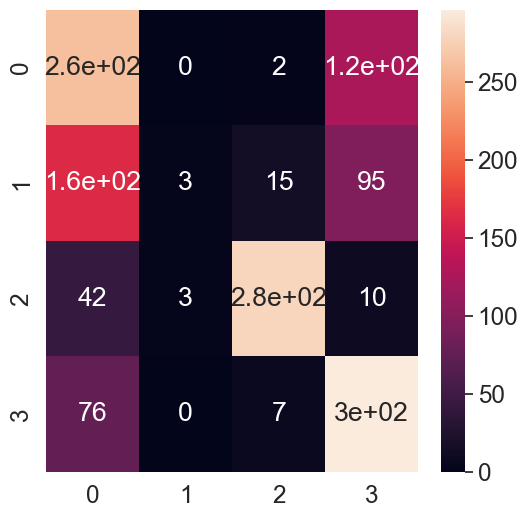

In [ ]:
cm_nvb = confusion_matrix(y_test, test_prediction_nvb)
fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm_nvb, annot=True, ax=ax)

print(classification_report(y_test, test_prediction_nvb))

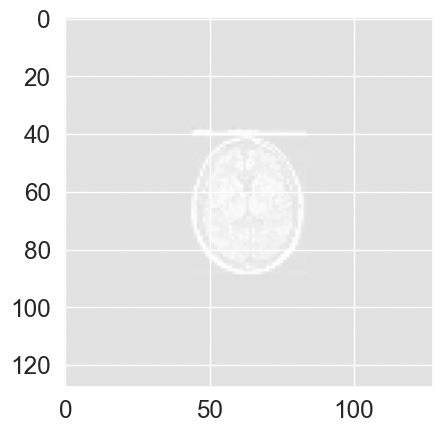

In [ ]:
#Check results on a few random images
import random
n=random.randint(0, X_test_n.shape[0]-1) #Select the index of image to be loaded for testing
img = X_test_n[n]
plt.imshow(img)

In [ ]:


#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = NVB_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", y_test[n])

The prediction for this image is:  ['no_tumor']
The actual label for this image is:  no_tumor


/opt/anaconda3/envs/TestEnv/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
